In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv("D:/sanaf/Documents/Sana_internship/Oasis/Unemployment in India.csv")
df.head() ## Display the first few rows of the dataset to understand its structure


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [10]:
#Check for missing values
df.isnull().sum

<bound method DataFrame.sum of      Region   Date   Frequency   Estimated Unemployment Rate (%)  \
0     False  False       False                             False   
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
763    True   True        True                              True   
764    True   True        True                              True   
765    True   True        True                              True   
766    True   True        True                              True   
767    True   True        True                              True   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                                     False  False  


In [11]:
# Descriptive statistics of the dataset
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [12]:
#Revealing basic information of the dataset
df.shape

(768, 7)

In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
df.duplicated().any()

True

In [16]:
df.Region.value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [20]:
#Changing the datatype of 'date' from object to datetime
df[' Date'] = pd.to_datetime(df[' Date'],dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [21]:
#Extracting month from date attribute
df['month_int'] = df['Date'].dt.month
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0


In [27]:
print(df['month_int'].unique())


[ 5.  6.  7.  8.  9. 10. 11. 12.  1.  2.  3.  4. nan]


In [28]:
import calendar

# Assuming 'month_int' is already of integer type
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[int(x)] if not pd.isna(x) else pd.NaT)
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0,Sep


In [33]:
#Numeric data grouped by months

data = df.groupby(['month'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
data=pd.DataFrame(data).reset_index()

In [36]:
#Bar plot of unemployment rate and labour participation rate

month = data.month
unemployment_rate = data[' Estimated Unemployment Rate (%)']
labour_participation_rate = data[' Estimated Labour Participation Rate (%)']

fig = go.Figure()

fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate',marker_color='green'))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate',marker_color='yellow'))

fig.update_layout(title = 'Unemployment Rate and Labour Participation',
                     xaxis = {'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']}      )
fig.show()

In [38]:
#Bar plot of estimated employed citizen in every month

import plotly.express as px
fig = px.bar(data,x='month',y=' Estimated Employed',color='month',
            category_orders ={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},
            title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

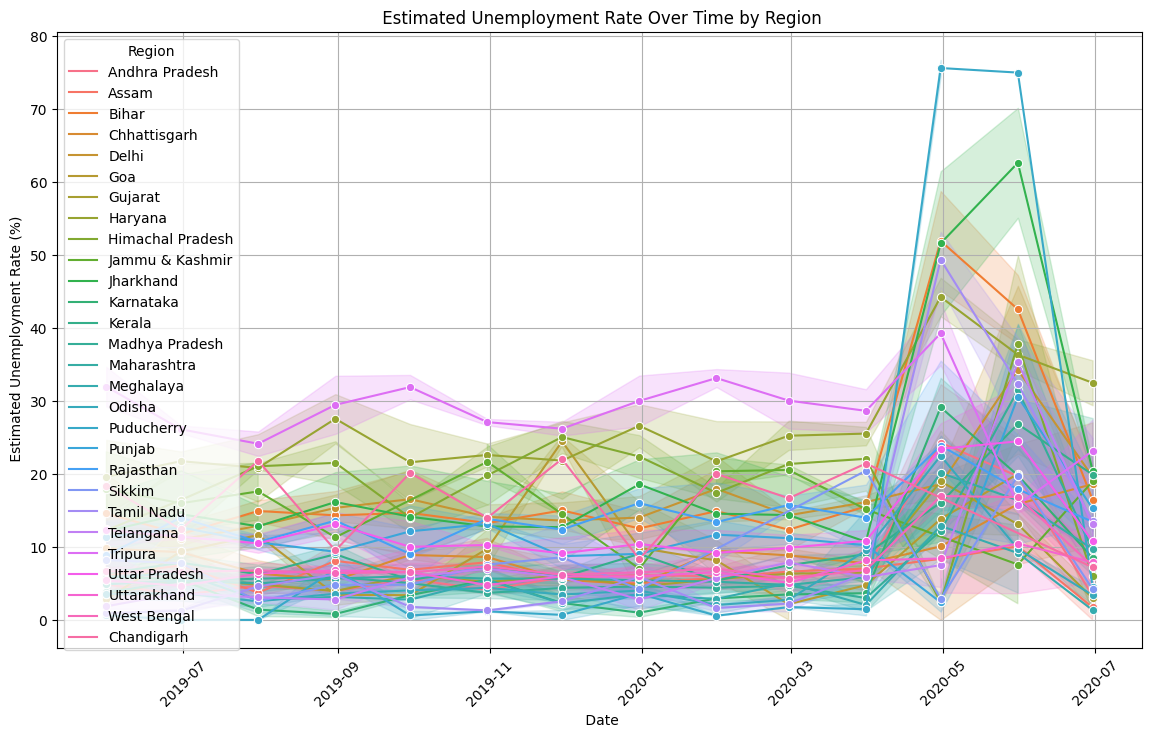

In [45]:
# Line chart for Estimated Unemployment Rate over time
plt.figure(figsize=(14, 8))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df, hue='Region', marker='o')
plt.title(' Estimated Unemployment Rate Over Time by Region')
plt.xlabel(' Date')
plt.ylabel(' Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left')
plt.grid(True)
plt.show()

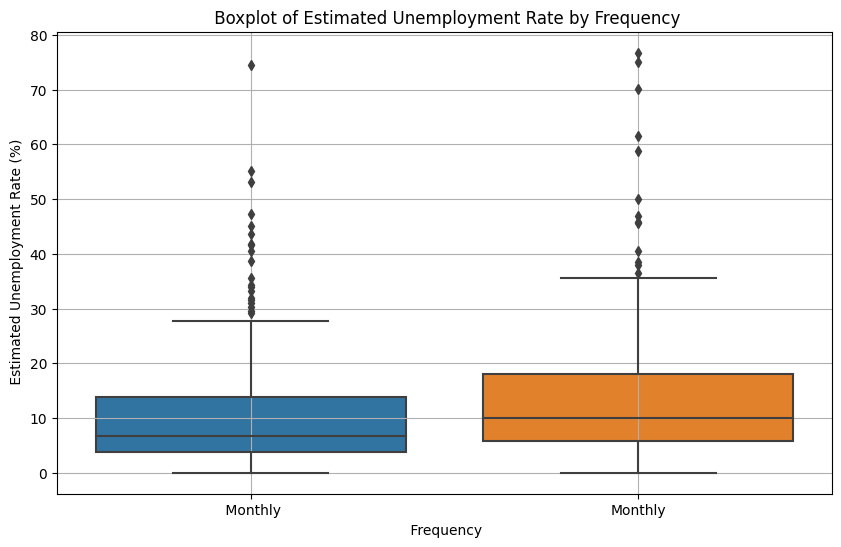

In [46]:
# Boxplot for Estimated Unemployment Rate by Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x=' Frequency', y=' Estimated Unemployment Rate (%)', data=df)
plt.title(' Boxplot of Estimated Unemployment Rate by Frequency')
plt.xlabel(' Frequency')
plt.ylabel(' Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

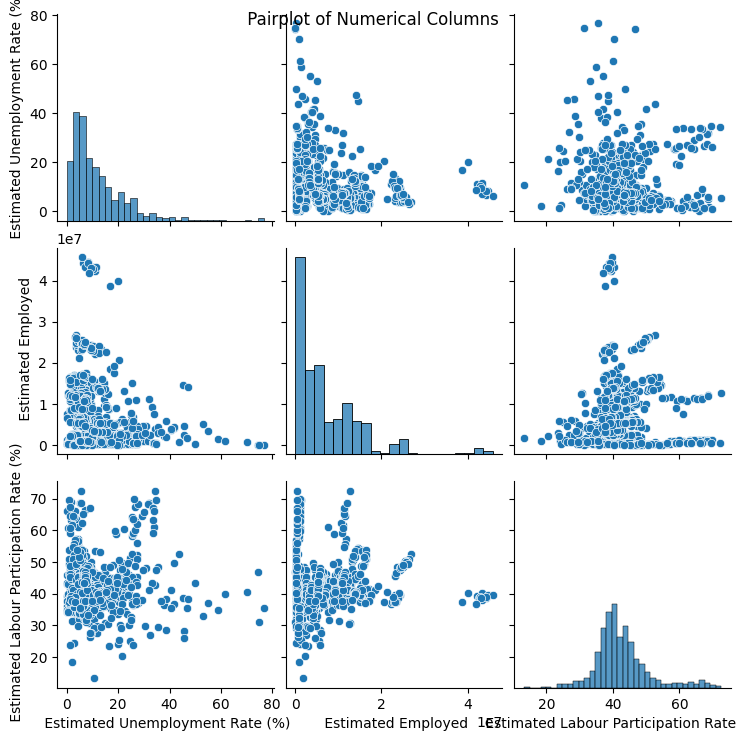

In [52]:
# Pairplot for numerical columns
sns.pairplot(df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']])
plt.suptitle(' Pairplot of Numerical Columns')
plt.show()

In [55]:
# numeric data grouped by region

region = df.groupby(['Region'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
region = pd.DataFrame(region).reset_index()

In [60]:
# Average Unemployment Rate

fig = px.bar(region,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Average unemployment rate(Region)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [61]:
# data representation before and after lockdown

before_lockdown = df[(df['month_int']>=1) &(df['month_int'] <4)]
after_lockdown = df[(df['month_int'] >=4) & (df['month_int'] <=6)]

In [63]:
af_lockdown = after_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

lockdown = before_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown['Unemployment Rate Before Lockdown'] = af_lockdown[' Estimated Unemployment Rate (%)']

lockdown.columns = ['Region','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
lockdown.head(15)

,Region,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,6.243333,11.126000
1,Assam,6.480000,6.563333
2,Bihar,14.276667,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,8.683333,12.720000
5,Delhi,16.145000,19.195000
6,Goa,5.074000,10.301429
7,Gujarat,6.138333,8.814000
8,Haryana,24.165000,30.887000
9,Himachal Pradesh,20.283333,14.982000
